In [130]:
from sklearn import datasets

In [131]:
data=datasets.load_iris()

In [132]:
feature=data.data
targets=data["target"]

In [133]:
feature.shape

(150, 4)

In [134]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [135]:
pca=PCA(n_components=2)
d2_feature=pca.fit_transform(feature)

In [136]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(d2_feature,targets,random_state=2,test_size=0.2)

In [137]:
x_train.shape

(120, 2)

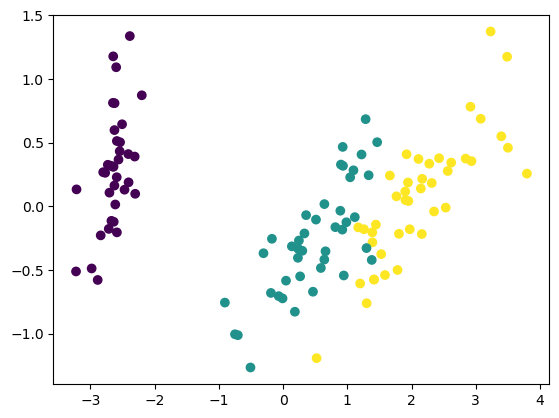

In [138]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)

In [139]:
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay

In [140]:
feature1,feature2=np.meshgrid(np.linspace( x_train[:,0].min(),x_train[:,0].max()),
            np.linspace(x_train[:,1].min(),x_train[:,1].max()))

In [141]:
grid = np.vstack([feature1.ravel(), feature2.ravel()]).T

In [142]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [143]:
y_pred = np.reshape(rfc.predict(grid), feature1.shape)

In [144]:
display = DecisionBoundaryDisplay(
    xx0=feature1, xx1=feature2, response=y_pred
)

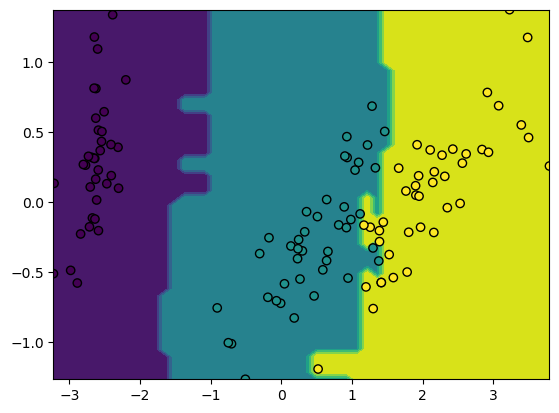

In [145]:
display.plot()

display.ax_.scatter(
    x_train[:,0],x_train[:,1],c=y_train,edgecolor="black"
)

In [146]:
# now on test data
test_feature1,test_feature2=np.meshgrid(np.linspace( x_test[:,0].min(),x_test[:,0].max()),
            np.linspace(x_test[:,1].min(),x_test[:,1].max()))

In [147]:
grid = np.vstack([test_feature1.ravel(), test_feature2.ravel()]).T

In [148]:
y_pred = np.reshape(rfc.predict(grid), test_feature1.shape)

In [149]:
display = DecisionBoundaryDisplay(
    xx0=feature1, xx1=feature2, response=y_pred
)

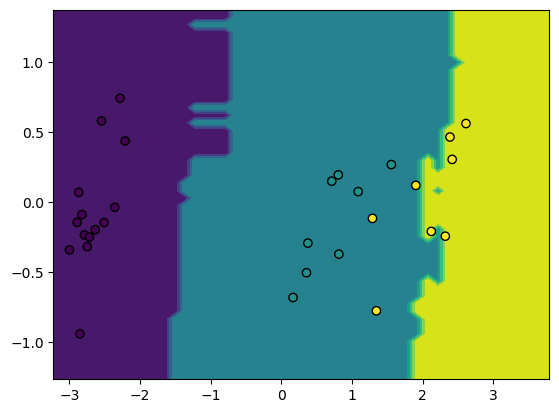

In [150]:
display.plot()

display.ax_.scatter(
    x_test[:,0],x_test[:,1],c=y_test,edgecolor="black"
)